![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjFm003pSAOtHmnUm7e--Xquwo90Hp5-U_3wSZrkChGz4tQYWZ)
# Introduction to Machine Learning
## Innopolis University 
### Week 1: ML, Derivatives, Cost Functions, Data Pre-processing
1. Data Reading

2. Data Visulization
3. Data Transformation
  * Drop User-Id columns
  * Missing values
  * Label Encoding
  * One-Hot-Encoding
  * Normalization
4. Data Splitting
  * Dependent/Independent
  * Train/Test/valid
5. Best Uninformed Prediction



# 1. Data Reading

1. Download Titanic Dataset
2. Explore the attributes

In [0]:
! wget http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls

--2019-08-19 09:58:27--  http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls
Resolving biostat.mc.vanderbilt.edu (biostat.mc.vanderbilt.edu)... 160.129.37.119
Connecting to biostat.mc.vanderbilt.edu (biostat.mc.vanderbilt.edu)|160.129.37.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284160 (278K) [application/vnd.ms-excel]
Saving to: ‘titanic3.xls.2’

titanic3.xls.2      100%[===================>] 277.50K   684KB/s    in 0.4s    

2019-08-19 09:58:28 (684 KB/s) - ‘titanic3.xls.2’ saved [284160/284160]



In [0]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
data = pd.read_excel("titanic3.xls")

In [0]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


# 2. Data Visulization



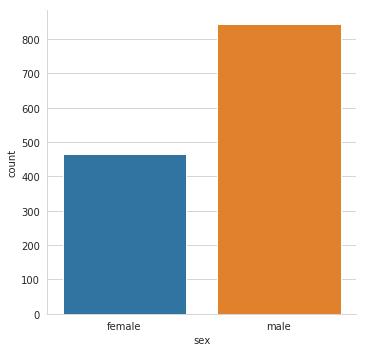

In [0]:
sns.catplot('sex',data=data,kind='count')

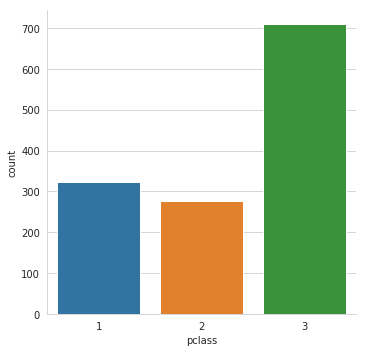

In [0]:
sns.catplot('pclass',data=data,kind='count')

# 3. Data Transformation

  * Drop User-Id columns
  * Missing values
  * Label Encoding
  * One-Hot-Encoding
  * Normalization

In [0]:
# Drop User-Name/ID columns 

data.drop('name',axis=1,inplace=True)
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Missing values are detected using panda's isnull() function

In [0]:
data.isnull().any()

pclass       False
survived     False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

In [0]:
def null_columns(data):
  cols = list(data.columns[np.where(data.isnull().any())])
  counts = data.isnull().sum()
  return {c:counts[c] for c in cols}
null_columns(data)

{'age': 263,
 'boat': 823,
 'body': 1188,
 'cabin': 1014,
 'embarked': 2,
 'fare': 1,
 'home.dest': 564}

In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data[['age','fare']] = imp.fit_transform(data[['age','fare']])
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[['embarked']] = imp.fit_transform(data[['embarked']])

In [0]:
null_columns(data)

{'boat': 823, 'body': 1188, 'cabin': 1014, 'home.dest': 564}

In [0]:
for c in null_columns(data):
  data.drop(c,axis=1,inplace=True)
data.drop("ticket",axis=1,inplace=True)

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.sex = le.fit_transform(data.sex)
data = pd.get_dummies(data)

In [0]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1
2,1,0,0,2.0000,1,2,151.5500,0,0,1
3,1,0,1,30.0000,1,2,151.5500,0,0,1
4,1,0,0,25.0000,1,2,151.5500,0,0,1


In [0]:
def normalize(df):
  return (df - df.min()) / df.max()

In [0]:
data[['age','sibsp','parch','fare']] = normalize(data[['age','sibsp','parch','fare']])
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,0.360416,0.000,0.000000,0.412503,0,0,1
1,1,1,1,0.009375,0.125,0.222222,0.295806,0,0,1
2,1,0,0,0.022916,0.125,0.222222,0.295806,0,0,1
3,1,0,1,0.372916,0.125,0.222222,0.295806,0,0,1
4,1,0,0,0.310416,0.125,0.222222,0.295806,0,0,1


In [0]:
data.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.644003,0.366706,0.062357,0.042781,0.064960,0.206264,0.093965,0.699771
std,0.837836,0.486055,0.478997,0.161316,0.130207,0.096173,0.100993,0.404777,0.291891,0.458533
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.272916,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.347916,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,0.435416,0.125000,0.000000,0.061045,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,0.997916,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. Data Splitting
  * Dependent/Independent
  * Train/Test/valid

In [0]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
            'embarked_C', 'embarked_Q', 'embarked_S']
X = data[features].values
y = data.survived.values
X.shape

(1309, 9)

In [0]:
y.shape

(1309,)

In [0]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1047, 9), (262, 9), (1047,), (262,))

# 5. Best Uniformed Prediction

We have a case where $ y = 5 *x $ 
if we want to predict the value of $ y$ given $ x$ we can just return $5 * x$

But we don't want have access to $ x $ 

what is the best prerdiction we can provide blindly without any information of $x$?

In [0]:
X = np.random.rand(50,1)*2
w = np.array([5])
noise = np.random.rand(50,) - 0.5
y = X.dot(w) + noise

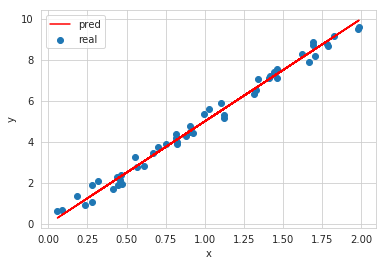

In [0]:
plt.scatter(X,y,label = "real")
plt.plot(X,X.dot(w), c = 'red',label="pred")
plt.xlabel('x')
plt.ylabel('y')

plt.legend()

In [0]:
from sklearn.metrics import mean_squared_error as mse 
def loss(y_true, y_pred):
  return mse(y_true, y_pred)
print("perfect loss : {:.04f}".format(loss(y,y)))
print("best prediction loss : {:.04f}".format(loss(y,X.dot(w))))

perfect loss : 0.0000
best prediction loss : 0.0846


best pred: 4.9300  loss: 7.125488


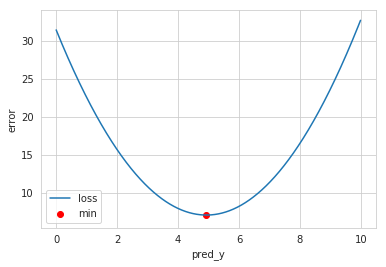

In [0]:
def plot_constant_loss(y,low,high):
  pred = np.arange(low,high,0.01)
  losses = [loss(y,np.ones_like(y) * p) for p in pred]
  
  plt.xlabel('pred_y')
  plt.ylabel('error')
  plt.plot(pred,losses,label="loss")
  m = np.argmin(np.array(losses))
  plt.scatter(pred[m], losses[m],c="red",label="min")
  plt.legend()
  print("best pred: {:.04f}  loss: {:.06f}".format(pred[m], losses[m]))
  
plot_constant_loss(y,0,10)

In [0]:
def analytical_best_solution(y):
  print("best pred: {:.04f}  loss: {:.06f}".format(y.mean(), loss(y, np.ones_like(y) * y.mean())))
analytical_best_solution(y)

best pred: 4.9320  loss: 7.125484
